In [ ]:
import pandas as pd
import numpy as np

In [ ]:
random_state=42

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data['quality'], test_size=0.2)

# 1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_dec_tree = DecisionTreeClassifier()
clf_bag = BaggingClassifier(n_estimators=100)
clf_rand_for = RandomForestClassifier(n_estimators=100)

In [ ]:
clf_dec_tree.fit(X_train, y_train)
clf_bag.fit(X_train, y_train)
clf_rand_for.fit(X_train, y_train)

In [ ]:
accur_dec_tree = accuracy_score(y_test, clf_dec_tree.predict(X_test))
accur_bag = accuracy_score(y_test, clf_bag.predict(X_test))
accur_rand_for = accuracy_score(y_test, clf_rand_for.predict(X_test))
print('Accuracy for: DecisionTreeClassifier', accur_dec_tree)
print('Accuracy for: BaggingClassifier', accur_bag)
print('Accuracy for: RandomForestClassifier', accur_rand_for)

Accuracy for: DecisionTreeClassifier 0.63125
Accuracy for: BaggingClassifier 0.70625
Accuracy for: RandomForestClassifier 0.7125


**Вывод:** 100 моделей лучше классифицируют объекты чем 1 модель

# 2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data['quality'], test_size=0.3)

# 3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [ ]:
n_estimators = [10, 50, 100, 200] + list(np.arange(400, 5001, 200))
print(n_estimators)

[10, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000]


In [ ]:
results = {}
for n_estimator in n_estimators:
  clf = RandomForestClassifier(n_estimators=n_estimator)
  clf.fit(X_train, y_train)
  accuracy = accuracy_score(y_test, clf.predict(X_test))
  results[n_estimator] = accuracy

In [ ]:
import matplotlib.pyplot as plt

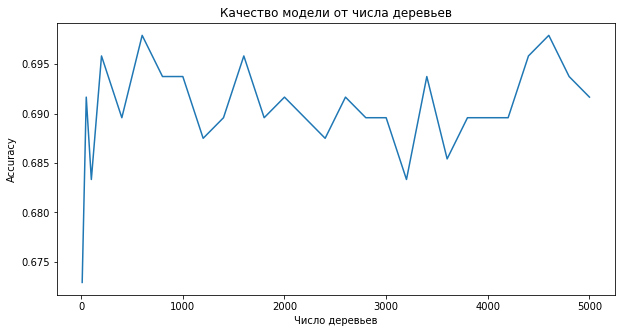

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(results.keys()), list(results.values()))
ax.set_xlabel('Число деревьев')
ax.set_ylabel('Accuracy')
ax.set_title('Качество модели от числа деревьев')
fig.set_size_inches(10, 5)
plt.show()

# 4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
cross_val_score(GradientBoostingClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

0.5615967868338558

In [ ]:
cross_val_score(XGBClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

0.5690987460815047

**Вывод:** градиентный бустинг с параметрами по умолчанию из библиотеки xgboost показал лучшее качество.

# 5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'loss': ['log_loss', 'deviance', 'exponential'],
          'learning_rate': [0.001, 0.01, 0.1],
          'n_estimators': [100, 200, 500],
          'max_depth': [5, 10, 50]}

In [ ]:
%%time
gb_sklearn = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gb_sklearn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' no

CPU times: user 15min 29s, sys: 2.19 s, total: 15min 31s
Wall time: 15min 32s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [ ]:
accuracy_score(y_test, gb_sklearn.predict(X_test))

0.6625

In [ ]:
gb_sklearn.best_params_

{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 5,
 'n_estimators': 500}

In [ ]:
%%time
gb_xgboost = GridSearchCV(XGBClassifier(), params, cv=3)
gb_xgboost.fit(X_train, y_train)

CPU times: user 6min 52s, sys: 5.34 s, total: 6min 57s
Wall time: 6min 56s


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [ ]:
accuracy_score(y_test, gb_xgboost.predict(X_test))

0.6666666666666666

In [ ]:
gb_xgboost.best_params_

{'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 100}

**Вывод:** градиентный бустинг библиотеки xgboost дает более высокое качество модели и имеет меньшеее время обучения в 2 раза в сравнении с градиентным бустингом библиотеки sklearn

# 6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:
!pip install lightgbm

In [ ]:
!pip install catboost

In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
cross_val_score(LGBMClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

0.5541026645768025

In [ ]:
cross_val_score(CatBoostClassifier(),
                data.drop('quality', axis=1), 
                data['quality'],
                scoring='accuracy').mean()

**Вывод:** Качество моделей с параметрами по умолчанию по accuracy:
* GradientBoostingClassifier - 0.5584
* XGBClassifier - 0.5690
* LGBMClassifier - 0.5541
* CatBoostClassifier - 0.5459



# 7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [ ]:
%%time
gb_lightgbm = GridSearchCV(LGBMClassifier(), params, cv=3)
gb_lightgbm.fit(X_train, y_train)

CPU times: user 3min 33s, sys: 11.4 s, total: 3min 44s
Wall time: 3min 44s


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [5, 10, 50],
                         'n_estimators': [100, 200, 500]})

In [ ]:
accuracy_score(y_test, gb_lightgbm.predict(X_test))

0.68125

In [ ]:
gb_lightgbm.best_params_

{'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_depth': 50,
 'n_estimators': 500}

In [ ]:
params_catboost = {'learning_rate': [0.001, 0.01, 0.1],
          'n_estimators': [100, 200, 500],
          'max_depth': [5, 10, 50]}

In [ ]:
%%time
gb_catboost = GridSearchCV(CatBoostClassifier(), params_catboost, cv=3)
gb_catboost.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, gb_catboost.predict(X_test))

0.6583333333333333

In [ ]:
gb_catboost.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

**Вывод:**
* лучшее качество модели по метрике accuracy (0.6791) показал алгоритм CatBoostClassifier с параметрами: максимальная глубина дерева 10, количество деревьев 200, скорость обучения 0.1
* самый быстрый аогоритм LGBMClassifier



# 8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from functools import partial

In [ ]:
search_space = {'learning_rate': hp.choice('x_learning_rate', [0.001, 0.01, 0.1]),
                'n_estimators': hp.choice('x_n_estimators', [100, 200, 500]),
                'max_depth': hp.choice('x_max_depth', [5, 10, 50])
                }

In [ ]:
def objective(params, X, y):

    clf_xgboost = XGBClassifier(**params)
 
    score = cross_val_score(estimator=clf_xgboost, X=X, y=y, 
                            scoring='accuracy', cv=3).mean()
                            
    # возвращаем результаты, которые записываются в Trials()
    return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

In [ ]:
trials = Trials()
best = fmin(partial(objective, X=data.drop('quality', axis=1), y=data['quality']),
            space=search_space, 
            algo=tpe.suggest, 
            max_evals=40,
            trials=trials,
            show_progressbar=True
        )

100%|██████████| 40/40 [05:42<00:00,  8.57s/it, best loss: -0.5809881175734835]


In [ ]:
results = pd.DataFrame([{**x, **x['params']} for x in  trials.results])
results.drop(labels=['status', 'params'], axis=1, inplace=True)
results.sort_values(by=['loss'], ascending=False, inplace=True)
results.tail(1) # лучший результат

,loss,learning_rate,max_depth,n_estimators
38,-0.580988,0.01,5,100


**Вывод:** перебор параметров с помощью библиотеки hyperopt прошел значительно быстрее. При этом получена модель сравнимого качества.

# 9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
pipe =  [('GradBoostClasr', GradientBoostingClassifier()),
        ('LGBMClassifier', LGBMClassifier()),
        ('XGBClassifier', XGBClassifier())]

In [ ]:
clf_stak = StackingClassifier(estimators=pipe, final_estimator=CatBoostClassifier())

In [ ]:
clf_stak.fit(X_train, y_train)

In [ ]:
accuracy_score(np.ravel(y_test, ), clf_stak.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6583333333333333

# 10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
pipe =  [('GradBoostClasr', GradientBoostingClassifier(learning_rate=0.01, 
                                                       max_depth=5,
                                                       n_estimators=500)),
        ('LGBMClassifier', LGBMClassifier(learning_rate=0.01, 
                                          max_depth=50, 
                                          n_estimators=500)),
        ('XGBClassifier', XGBClassifier(learning_rate=0.1, 
                                        max_depth=5, 
                                        n_estimators=100))]

In [ ]:
clf_stak = StackingClassifier(estimators=pipe, 
                              final_estimator=CatBoostClassifier(
                                  learning_rate=0.1, 
                                  max_depth=10, 
                                  n_estimators=100))

In [ ]:
clf_stak.fit(X_train, y_train)

In [ ]:
accuracy_score(np.ravel(y_test, ), clf_stak.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6479166666666667

**Вывод:** стекинг с параметрами по умолчанию показывает лучшее качество по метрике accuracy